# Linear regression



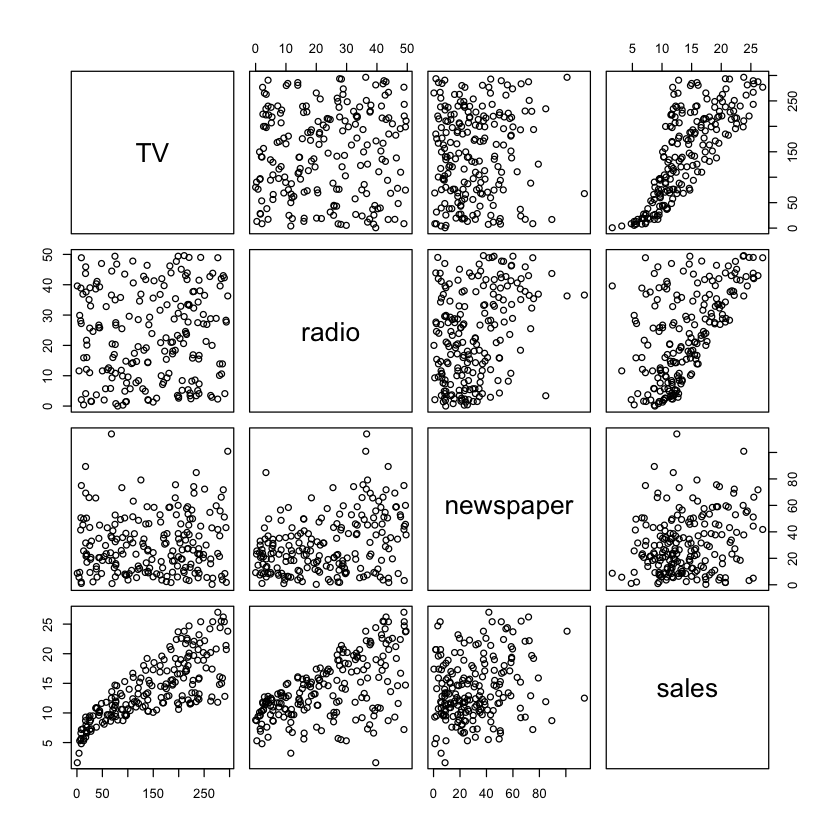

In [5]:
advertising_url = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
a <- read.csv(advertising_url, row.names=1)
plot(a)

## Simple linear regression

$Y = \beta_0 + \beta_1 X$

$\beta_0$ - intersept, $\beta_1$ - slope

Typical approach to calculate coefissients is to minimize *least squared*. 

$\hat{y}_i = \hat{\beta_0} + \hat{\beta_1}x_i $ - prediction of ith result. Then $e_i = y_i - \hat{y_i}$ - *residual*.

$RSS = e_1^2 + e_2^2 + \dots + e_n^2$ - Residual sum of squares. Coefficients are chosen to minimize RSS. In other worlds, $RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x)^2 + \dots + (y_n - \hat{\beta_0} - \hat{\beta_1}x)^2$. 

SO, $\hat{\beta_1} = \frac{\sum\limits_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}$ , 

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$


True relationship is called *population regression line*. Least square approximation - *least squared line*.

Notion of *standart error*:

$Var(\hat{\mu}) = SE(\hat{\mu}^2) = \frac{\sigma^2}{n}$, where $\sigma$ is a standart deviation for each $y_i$. (How much estimate $\hat{\mu}$ differs from real $\mu$).


Standart error associated with coeficients: 

$SE(\hat{\beta_0})^2 = \sigma^2\lbrack \frac{1}{n} + \frac{\bar{x}^2}{\sum\limits_{i=1}^n(x_i - \bar{x})^2} \rbrack$, 

$SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum\limits_{i=1}^n(x_i - \bar{x})^2}$, where $\sigma^2 = Var(\epsilon)$. $\sigma$ is unknown but calculated from data. 

$\sigma = RSE = \sqrt{\frac{RSS}{n-2}}$ - residual standart error.

Standart errors are used to calculate *confidence intervals*.

For linear regression, the confidence interval (means there's 95% chance of it to have true value of $\beta_1$) turns out as following: 

$\lbrack \hat{\beta_1} - 2SE(\hat{\beta_1}),    \hat{\beta_1} + 2SE(\hat{\beta_1})\rbrack$


For $\hat\beta_0$, same : $\hat\beta_0 +- 2SE(\hat\beta_0)$

For checking null hypotesis typically we calculate *t-statistics* which determines the number of standart deviations that $\hat{\beta_1}$ is from 0.

$t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}$

*P-value* is a probability of observing any value equal to |t| or larger. The smaler p-value is, the less chance to have this observation by chance. 


### Accuracy of simple model

* RSE  - average amount that response will deviate from true regression line (measure of *lack of fit*)
* $R^2$ - statistics. Alternative measure of fit. Thakes the form of *proportion*. $R^2  = 1 - \frac{RSS}{TSS}$, where $TSS = \sum(y_i - \bar{y})^2$ - *total sum of squares*. TSS measures the total variance in response, RSS measures amount of variability that left unexplained after linear regression.
* F - statistics


## Multiple linear regression

$Y = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p + \epsilon$

Null hypotesys is checked with *F-statistics*:

$F = \frac{\frac{TSS-RSS}{p}}{\frac{RSS}{n-p-1}}$. If there's no relationship, F-statistic is close to 1.

If alternativce hypotesis is true, F-statistics should be greater than 1.

Approaches to reduce number of variables:
* Forward selection
* Backward selection
* Mixed selection





# Classification

Used when responsive variable is qualitative. *Classification* - prediction of qualitative responces.

Most widely used classifiers:
* Logistic regression
* Linear discriminant analysis 
* KNN






The downloaded binary packages are in
	/var/folders/nh/xb1bcf2s1fdfy5lxpp1g29bm0000gn/T//RtmpkRHtDv/downloaded_packages


The following objects are masked from d (pos = 3):

    balance, default, income, student

The following objects are masked from d (pos = 4):

    balance, default, income, student

The following objects are masked from d (pos = 5):

    balance, default, income, student

The following objects are masked from d (pos = 6):

    balance, default, income, student

The following objects are masked from d (pos = 7):

    balance, default, income, student



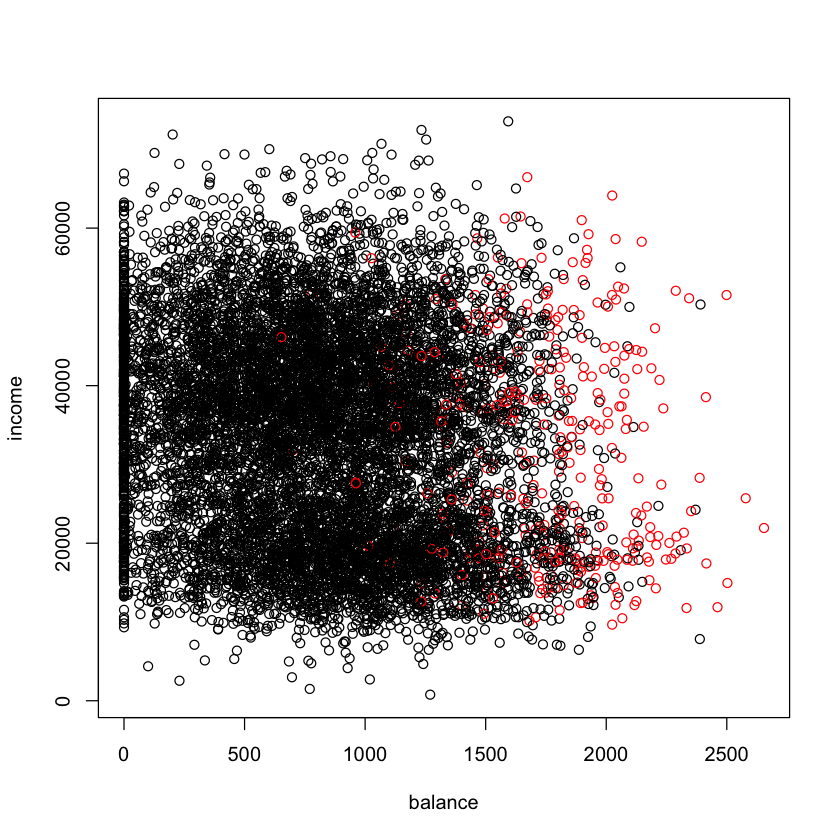

In [7]:
install.packages("ISLR")
library("ISLR")
data(Default)
d <- Default
attach(d)
plot(income~balance, col=default)

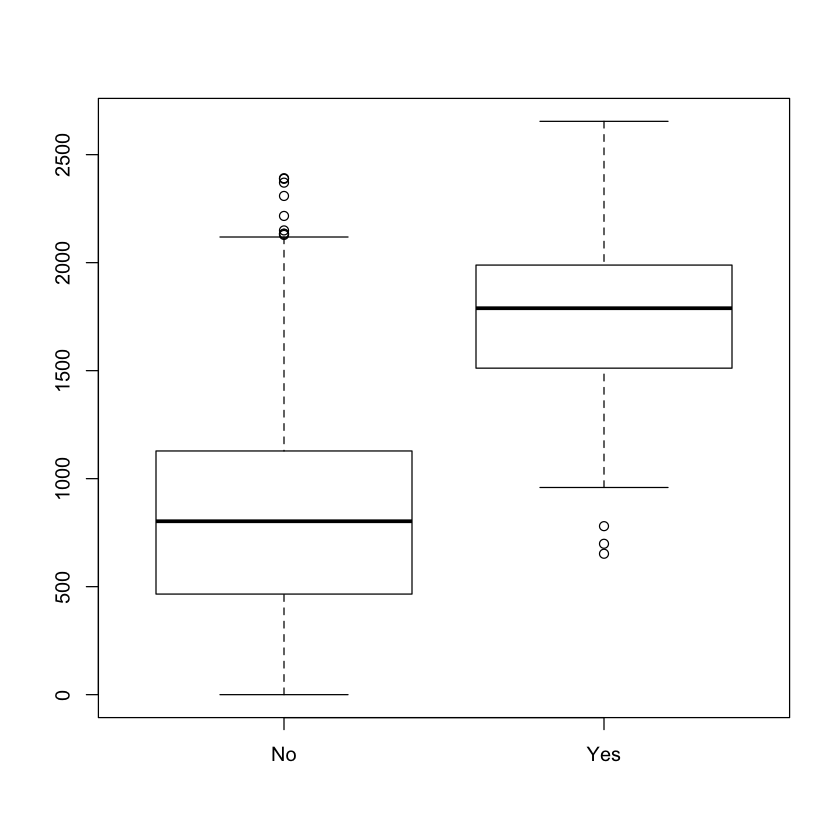

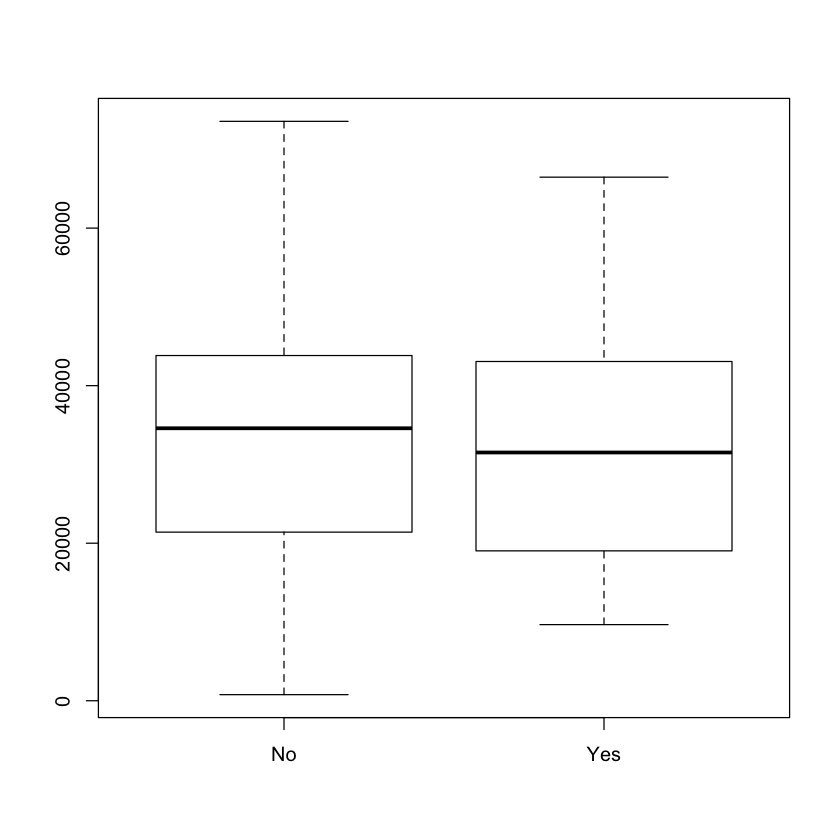

In [8]:
boxplot(balance~default)
boxplot(income~default)

## Logistic regression

Developed by David Cox in 1958. 

Logistic regression models the *probability* that Y belongs to a particular category. For logistic regression, outcome is not continuous, so the assumptions of linear regression are violated. In particular, the *residuals cannot be normally distributed*.

$p(X) = Pr(Y=1|X)$

Probability vs Likelihood: 

Probability: $P(event | model)$

Likelyhood: $P(model | event)$

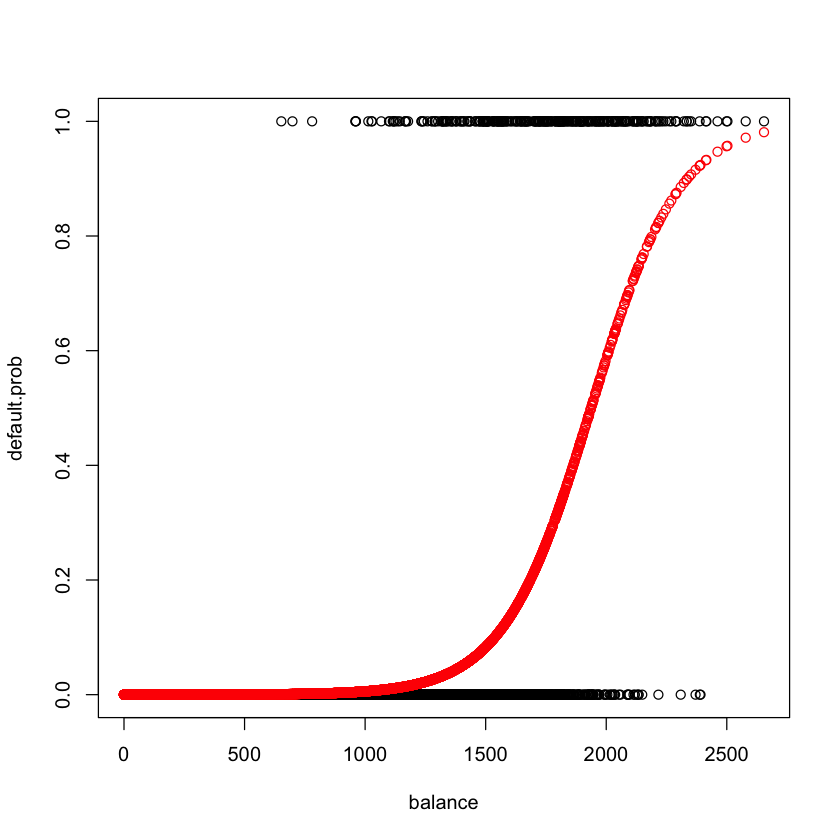

In [11]:
fit <- glm(default~balance, family=binomial)
default.prob <- as.integer(default)-1
plot(default.prob~balance)
points(balance,predict(fit,d, type="response"), col="red")

For prediction of response, in logistic regression we're typically use *logistic function* as it meets criteria to produce output between [0,1] (that is not tru for simple linear regression model unless X is limited).

$p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 +e^{\beta_0 + \beta_1 X}}$

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png "Logistic function")


*ODDS* = $\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$


*log-odds* or *logit*: $log(\frac{p(X)}{1 - p(X)}) = \beta_0 + \beta_1 X$

The logit transformation is referred to as the *link function* in logistic regression—although the dependent variable in logistic regression is binomial, the logit is the continuous criterion upon which linear regression is conducted.

NOTE: relation between $p(X)$ and X is not linear, so increase of $\beta_1$ doe not implies linear increase of pr(X) and depends on current value of X, in contrast to linear regression.

To predict the model, we use *maximum likelihood method*:

$l(\beta_0, \beta_1) = \prod_{i: y_i = 1}p(x_i) \prod_{i': y_{i'} = 0}(1 - p(x_{i'}))$. To estimate $\hat{\beta_0}, \hat{\beta_1}$ we are maximizing likelihood function.

Unlike linear regression with normally distributed residuals, it is not possible to find a closed-form expression for the coefficient values that maximize the likelihood function, so that an iterative process must be used instead.

In some instances the model may not reach convergence. Nonconvergence of a model indicates that the coefficients are not meaningful because the iterative process was unable to find appropriate solutions. A failure to converge may occur for a number of reasons: having a large ratio of predictors to cases, multicollinearity, sparseness, or complete separation.

In [12]:
fit <- glm(default~balance, family=binomial)
summary(fit)


Call:
glm(formula = default ~ balance, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


#### Model estimation

Z-statistics plays the same role as t-statistics for linear regression. Large absolute number of z-statistics is typically an evidence against null-hypotesys. 

The estimate intercept is typically not of interest.

A widely used rule of thumb states that logistic regression models give stable values for the explanatory variables if based on a minimum of about 10 events per explanatory variable (EPV).

Pseudo-$R^2$:
* Likelihood ratio $R^2_L = \frac{D_{null} - D_{fitted}}{D_{null}}$. 
* Cox and Snell $R^2_{CS} = 1 - (\frac{L_m}{L_0})^{\frac{2}{n}}$. Problems: The highest this upper bound can be is 0.75, but it can easily be as low as 0.48 when the marginal proportion of cases is small.
* Nagelkerke $R^2_N$. provides a correction to the Cox and Snell so that the maximum value is equal to 1. 
* McFadden $R^2_{McF} = 1 - \frac{ln(L_M)}{ln(L_0)}$. $L_M$ - fitted model with maximized likelihood; $L_0$ - null model with only intercept
* Tjur $R^2_T$

In [13]:
predict(fit,data.frame("balance"=1:2*1e3), type="response")

1           2 
0.005752145 0.585769370

### Multiple logistic regression

Problem of predicting a binary response using multiple predictors.

$log(\frac{p(X)}{1 - p(X)}) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p$

We use maximum likelihood to estimate coefficients. 



In [14]:
fit <- glm(default~., data=d, family=binomial)
summary(fit)


Call:
glm(formula = default ~ ., family = binomial, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


### Logistic Regression for >2 Response Classes

* One-vs-rest: train K-1 models
* One-vs-all: train K models
* One-vs-one: train K(K-1)/2 models

## Linear Discriminant Analysis 

Model the distribution of the predictors X separately in each of the response classes (i.e. given Y ), and then use Bayes’ theorem to flip these around into estimates for $Pr(Y = k|X = x)$.

Bayes’ theorem states that:

$Pr(Y = k| X=x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^K \pi_l f_l(x)}$, where $\pi_k$ represent the overall or *prior* prior probability that a randomly chosen observation comes from the kth class, $f_k(X) = Pr(X-x | Y=k)$ - *density function* of X for an observation that comes from the kth class. 

For $\pi_k$ we do esimation based on a random sample observation from k-th class.

$p_k(X) = Pr(Y=k, X)$ is a *posterior* probability that an observation X = x belongs to the kth class. It is the probability that the observation belongs to the kth class, given the predictor value for that observation.

$Posterior = \frac{Prior * Likelihood}{Evidence}$

### LDA for p=1

We assume that $f_k(X)$ is normal or Gaussian. The normal density will take the following form:

$f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k} exp(-\frac{1}{2\sigma_k^2}(x - \mu_k)^2)$, where $\mu_k$ and $\sigma_k^2$ - mean and varians for Kth class. 

Some aruphmetics: plugging this into Bayes' theorem and taking log: 

$\delta_k(X) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k)$. We are assigning the observation to the class for which $\delta_k$ is largest.

**LDA** method approximates the Bayes classifier by plugging estimates for: 

$\hat{\mu_k} = \frac{1}{n_k}\sum_{i:y_i = k}x_i$

$\sigma^2 = \frac{1}{n-K}\sum_{k=1}^K \sum_{i:y_i = k}(x_i - \hat\mu_k)^2$, where n - number of observations in training set, $n_k$ - number of observation belonging to kth class.

If prior probabilities is unknown, LDA uses following approximation:

$\hat\pi_k = \frac{n_k}{n}$.



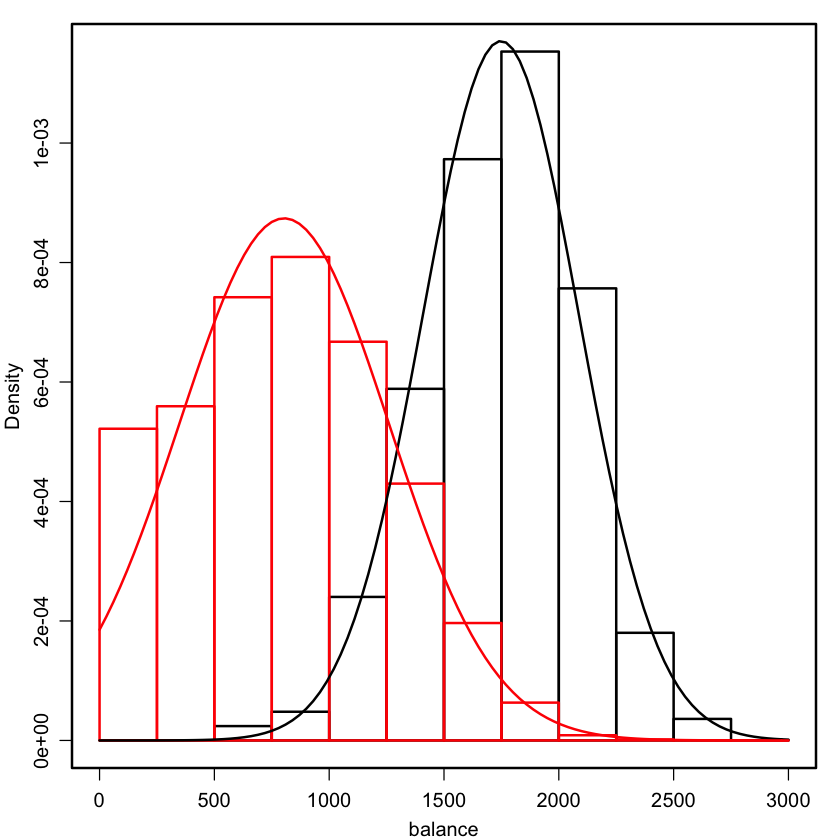

In [15]:
par(mar=c(3,3,1,1), mgp=c(2,0.8, 0), lwd=2)
hist(balance[default=="Yes"], xlim=c(0, 3000), breaks=0:12*250, prob=T, main="", xlab="balance")
hist(balance[default=="No"], xlim=c(0, 3000), breaks=0:12*250, border="red", add=T, prob=T)
box()
# Fit the normal distributions
library(MASS)
fit <- fitdistr(balance[default=="Yes"], "normal")
curve(dnorm(x, fit$estimate[1], fit$estimate[2]), add = TRUE)
fit <- fitdistr(balance[default=="No"], "normal")
curve(dnorm(x, fit$estimate[1], fit$estimate[2]), col="red", add = TRUE)

### LDA for p>1

Multivariate Gaussian density defined as: 

$f(x) = \frac{1}{(2\pi)^p/2|\sum|^1/2}$ $ exp(− 1/2 (x −\mu)^T \sum^{-1}(x − \mu)) $

Plugging this to bayes' theorem and rearranging terms, we assign observation to a class with largest

$\delta_k(X) = x^T \Sigma^{-1}\mu_k -1/2 \mu_k^T \Sigma^{-1}\mu_k + log(\pi_k)$



*Sensitivity* - true negative ratio

*Specificity* - true positive ratio

## Quadratic Discriminant Analysis

Unlike LDA assumes that each class has its own covariance matrix.



# Data

## Quality

* **Completeness**  - the proportion of stored data against the potential of "100% complete". A measure of the absence of blank (null or empty string) values or the presence of non-blank values.
* **Uniqueness**  - No thing will be recorded more than once based upon how that thing is identified. Unit of measure - percentage.
* **Timeliness** - The degree to which data represent reality from the required point in time. Measure: time difference between observation and record of data 
* **Conformity/Validity** - Data are valid if it conforms to the syntax (format, type, range) of its definition. Measure: Comparison between the data and the metadata or documentation for the data item.
* **Accuracy**  - The degree to which data correctly describes the "real world" object or event being described. 
* **Consistency** - The absence of difference, when comparing two or more representations.
* **Integrity**  - What data is missing important relationship linkages? The inability to link related records together may actually introduce duplication across your systems. Not only that, as more value is derived from analyzing connectivity and relationships, the inability to link related data instance together impedes this valuable analysis. 

## Pre-processing
* Cleaning 
    * Fill in missing values
    * Smooth noisy data 
    * Identify & remove outliers
    * Resolve inconsistencies
* Integration - integrate with other sources of data 
* Reduction - reduce volume while keeping valuable information 

## Dealing with missing data

![image](https://www.dropbox.com/s/1zfi8uhz166ddwt/Screenshot%202018-02-04%2014.27.38.png?dl=1)

    
### Mechanisms of missing data
* **MCAR** - missing completely at random. The probability that a variable value is missing does not depend on the observed data values nor on the missing data values
* **MAR**  - missig at random. The probability that a variable value is missing partly depends on other data that are observed in the dataset, but does not depend on any of the values that are missing
* **MNAR** - missing not at random. The probability that a variable value is missing depends on the missing data values themselves 

### Missing data treatments:
* **Listwise Deletion**. Delete all cases (persons) for whom any data are missing, then proceed with the analysis.
    * Discards real data from partial respondents. Smallest n, lowest power. Biased under MAR and MNAR
    ![image](https://www.dropbox.com/s/my1n8eww15hoiti/Screenshot%202018-02-04%2015.38.07.png?dl=1)
* **Pairwise Deletion**. Calculate summary estimates (means, SDs, correlations) using all available cases (persons) who provide data relevant to each estimate, then proceed with analysis based on these estimates. 
    * Different correlations represent different subpopulation mixtures. Sometimes covariance matrix is not positive definite. Biased under MAR and MNAR. No single n makes sense for whole correlation matrix (SEs inaccurate).
    ![image](https://www.dropbox.com/s/dx5wc7p5031xskq/Screenshot%202018-02-04%2015.42.02.png?dl=1)
* **Single Imputation**. Fill in each missing value e.g., using mean(across persons) imputation, regression imputation, hot deck imputation, etc., then proceed with analysis based on partiallyimputed ‘complete’ dataset.
    * Mean (across persons) imputation and regression imputation are both biased under MCAR! No single n makes sense for whole correlation matrix (SEs inaccurate). SEs underestimated if you treat dataset as complete.
    ![image](https://www.dropbox.com/s/m92w6ivm9mxr741/Screenshot%202018-02-04%2015.42.13.png?dl=1)
* **Maximum Likelihood**. Directly estimate parameters of interest from incomplete data matrix (e.g., FIML); or Compute summary estimates means, SDs, correlations (e.g., EM algorithm), then proceed with analysis based on these summary estimates.
    * Unbiased under MCAR and MAR. Improves as you add more variables to the imputation model. Number of variables should be < 100. Accurate SEs for FIML. For EM algorithm, no single n makes sense for whole correlation matrix (SEs inaccurate).
* **Multiple Imputation**. Impute missing values multiple times, to create 40, partially-imputed datasets. Run the analysis on each imputed dataset. Combine the 40 results to get parameter estimates and standard errors.
    * Unbiased under MCAR and MAR. Improves as you add more variables to the imputation model. Number of variables should be < 100. Accurate SEs. Gives slightly different estimates each time. When used with SEM, suffers more nonconvergences.
    ![image](https://www.dropbox.com/s/mj0zw1tnxa60ok2/Screenshot%202018-02-04%2015.44.07.png?dl=1)
    
![image](https://www.dropbox.com/s/a4p58id1bhqlbqk/Screenshot%202018-02-04%2015.44.28.png?dl=1)

## Practical Guidelines for Missing Data Analysis
1. Use All the Available Data (Do Not Use Listwise Deletion). 

2. Do Not Use Single Imputation (Do Not Simply Impute Data Once and Then Proceed as Though You Have Complete Data).

3.  Construct-Level Missingness: Use Maximum Likelihood or Multiple Imputation Missing Data Treatments Whenever 10% or More of The Respondent Sample Is Made Up of Construct-Level Partial Respondents (i.e., Respondents Who Reported on at Least One Construct but Who Omitted at Least One Construct)

4. Item-Level Missingness—One Item Is Enough:
    * When conducting an item-level analysis (e.g., item-level factor analysis or item-level SEM), the analysis should be based on ML or MI missing data techniques
    * When conducting a construct-level analysis, if a participant responds to any items (even a single item) from a multi-item scale, then the participant’s average response across the item(s) answered should be used to represent the participant’s scale/construct score.
    
5. Person-Level Missingness: If the Response Rate Is Below 30%, Report Systematic Nonresponse Parameters and Consider Conducting Sensitivity Analyses


## Data sampling
* **Simple Random Sampling** (SRS)
* **Systematic Sampling** (also known as interval sampling) relies on arranging the study population according to some ordering scheme and then selecting elements at regular intervals through that ordered list.
* **Stratified Sampling** When the population embraces a number of distinct categories, the frame can be organized by these categories into separate "strata." Each stratum is then sampled as an independent sub-population, out of which individual elements can be randomly selected.
* Cluster Sampling
* Quota sampling

